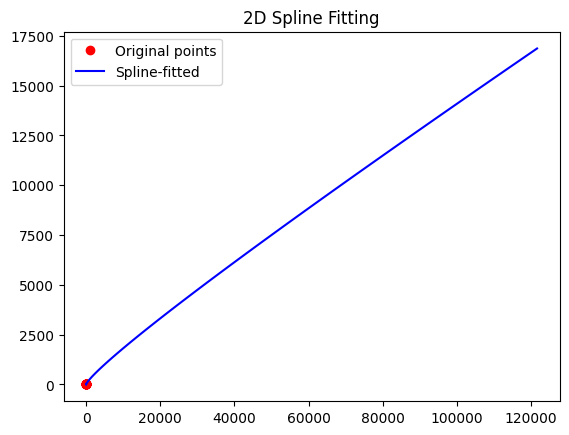

Spline-based 3D structure:
 [[-6.09403878e-18  1.00000000e+00  5.35496990e-18]
 [ 2.03784694e-01  9.81088296e-01  2.04081633e-01]
 [ 3.97435221e-01  9.18639835e-01  4.08163265e-01]
 [ 5.74421993e-01  8.17941547e-01  6.12244898e-01]
 [ 7.28215426e-01  6.84280367e-01  8.16326531e-01]
 [ 8.52285932e-01  5.22943224e-01  1.02040816e+00]
 [ 9.40550613e-01  3.39540702e-01  1.22448980e+00]
 [ 9.89815522e-01  1.41776591e-01  1.42857143e+00]
 [ 9.98049241e-01 -6.18134404e-02  1.63265306e+00]
 [ 9.64619223e-01 -2.62793303e-01  1.83673469e+00]
 [ 8.91508036e-01 -4.52917445e-01  2.04081633e+00]
 [ 7.81193532e-01 -6.24078931e-01  2.24489796e+00]
 [ 6.38421688e-01 -7.69455135e-01  2.44897959e+00]
 [ 4.69335061e-01 -8.83014759e-01  2.65306122e+00]
 [ 2.80583748e-01 -9.59618003e-01  2.85714286e+00]
 [ 8.02431378e-02 -9.96699733e-01  3.06122449e+00]
 [-1.23353765e-01 -9.92271787e-01  3.26530612e+00]
 [-3.21908544e-01 -9.46559178e-01  3.46938776e+00]
 [-5.07155077e-01 -8.61853229e-01  3.67346939e+00]
 [-

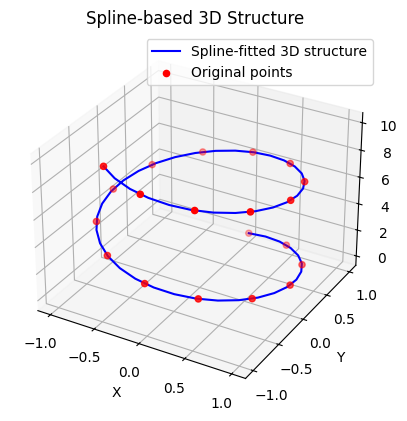

In [1]:
import numpy as np
from scipy.interpolate import splprep, splev
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Simulate 2D camera trajectory (time, x, y)
n_points = 20
time = np.linspace(0, 10, n_points)
trajectory = np.sin(time), np.cos(time)  # Example 2D trajectory

# Fit a B-spline to the camera trajectory
tck, u = splprep(trajectory, s=0)
new_time = np.linspace(0, 10, 100)
smoothed_trajectory = splev(new_time, tck)

# Plot original vs. spline-fitted 2D trajectory
plt.figure()
plt.plot(trajectory[0], trajectory[1], 'ro', label='Original points')
plt.plot(smoothed_trajectory[0], smoothed_trajectory[1], 'b-', label='Spline-fitted')
plt.legend()
plt.title('2D Spline Fitting')
plt.show()

# Estimate 3D structure by interpolating camera position at various time intervals
def estimate_3d_structure_spline(trajectory, num_points):
    tck, u = splprep(trajectory, s=0)
    u_new = np.linspace(0, 1, num_points)
    interpolated = splev(u_new, tck)
    return np.array(interpolated).T

# Simulated 3D trajectory (sinusoidal curve in 3D)
trajectory_3d = [np.sin(time), np.cos(time), time]
structure_3d_spline = estimate_3d_structure_spline(trajectory_3d, 50)
print("Spline-based 3D structure:\n", structure_3d_spline)

# 3D Plot of the spline-fitted 3D structure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot original points and the spline-fitted curve
ax.plot(structure_3d_spline[:, 0], structure_3d_spline[:, 1], structure_3d_spline[:, 2], 'b-', label='Spline-fitted 3D structure')
ax.scatter(trajectory_3d[0], trajectory_3d[1], trajectory_3d[2], color='red', label='Original points')

# Labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Spline-based 3D Structure')
ax.legend()

plt.show()